![example](images/director_shot.jpeg)

# Microsoft Film Performance Analysis

**Authors:** Ian Musau
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Microsoft is looking to endavour into the film industry and would like analysis on the types of films 
that would be the most profitable to create. By profiling the genres most likely to succeed, the risk factor 
is reduced for the new studio.

This will be accomplished by answering the following questions:
- Which film genres perform the best at the box office?
- Which film genres receive the highest ratings by viewers?
- Which movies present the highest return on investment when budget and box office performance are compared?
- Which themes are most represented among the most successful movies?


These questions will give a solid understanding of how different genres tend to perform at theaters. Once
answered, Microsoft will easily be able to judge the most prudent genres to venture into.

## Data Understanding

The film data used in this analysis was sourced from IMDb, The Movie Database and
The Numbers. A multitude useful data is in the datatsets including box office performance, 
ratings by viewers and budgets.

The main point of focus will be the genres of the movies. Grouping by genre and the comparing 
metrics such as box office performance and viewer ratings will give insight as to best kinds 
of movies the studio can pursue.

In order to recreate the analysis, extract the files in "zippedData" into a folder named "data" in the project root directory.

In [13]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 
from matplotlib import rcParams



%matplotlib inline

conn = sqlite3.connect('data/im.db')

#### Exploring IMDb dataset ####

The first point of interest is dicovering the tables in the IMDb database and the sort of information within.

In [14]:
imdb_tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type = 'table';", conn)
imdb_tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [15]:
#inspecting the movie basics information
imdb_basics_df = pd.read_sql("SELECT * FROM movie_basics", conn)
print(imdb_basics_df.info())
imdb_basics_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [16]:
#inspecting movie_ratings table
imdb_ratings_df = pd.read_sql("SELECT * FROM movie_ratings", conn)
print(imdb_ratings_df.info())
imdb_ratings_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


#### Exploring TheMovieDB Dtataset ####

In [17]:
#inspecting tmdb.movies.csv
tmdb_movie_df = pd.read_csv("data/tmdb.movies.csv")
print(tmdb_movie_df.info())
tmdb_movie_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


### Exploring The Numbers Dataset ####

In [18]:
#inspecting tn.movie_budgets.csv
def load_tn():
    return pd.read_csv("data/tn.movie_budgets.csv")

tn_budgets_df = load_tn()
print(tn_budgets_df.info())

tn_budgets_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


## Data Preparation

From the data above, a combined dataset is compiled using titles from IMDb and ratings from both 
IMDb and TheMovieDB. Budget and revenue data from The Numbers is then attached to the relevant 
movie using the titles to join them.

Missing values were dropped from the dataset as the datasets containing monetary data are significantly 
smaller than the entire dataset of movies. Films that do not have revenue and budget data are 
not useful in the analysis as we are trying to ascertain the most profitable types of movies.

With this combined dataset, visualizations are easily created with all relevant information in 
one place.

#### Creating combined dataset

1. Gather ratings from IMDb and TheMovieDB

In [19]:
#remove duplicates
def remove_combined_duplicates():
    combined_film_df.drop_duplicates(subset="name", keep="first", inplace=True)

#combining the IMDb tables first
combined_film_df = imdb_basics_df[["movie_id","primary_title", "genres", "runtime_minutes"]].copy()
combined_film_df.rename(columns={"primary_title" : "name"}, inplace=True)
combined_film_df.rename(columns={"runtime_minutes" : "runtime"}, inplace=True)
combined_film_df.name = combined_film_df.name.str.strip()
remove_combined_duplicates()
#assigning films their associated ratings using the movie_id foreign key in ratings table
combined_film_df = pd.merge(combined_film_df, imdb_ratings_df, on = ["movie_id"], how = "right")
combined_film_df.rename(columns={"averagerating" : "imdb_rating"}, inplace=True)
#number of votes not used in analysis
combined_film_df.drop("numvotes", axis = 1, inplace=True)

#renaming movie title column for simpler merging
tmdb_movie_df.rename(columns={"original_title" : "name"}, inplace=True)
#adding ratings from The Movie Database
combined_film_df = pd.merge(combined_film_df, tmdb_movie_df, on = ["name"], how = "right")
#dropping columns not used in analysis
combined_film_df.drop([
    "movie_id", "Unnamed: 0", "genre_ids", "id", "original_language", "popularity", "release_date",
    "title", "vote_count"
], axis = 1, inplace = True)
combined_film_df.rename(columns={"vote_average" : "moviedb_rating"}, inplace=True)
combined_film_df.dropna(inplace=True)

#remove the few movies that don't have a rating on movie_db
combined_film_df = combined_film_df[combined_film_df.moviedb_rating != 0]

print("Dataset Size: ",len(combined_film_df))
combined_film_df.head(2)

Dataset Size:  13886


,name,genres,runtime,imdb_rating,moviedb_rating
0,Harry Potter and the Deathly Hallows: Part 1,"Adventure,Fantasy,Mystery",146.0,7.7,7.7
1,How to Train Your Dragon,"Action,Adventure,Animation",98.0,8.1,7.7


2. Gather monetary information from The Numbers dataset

In [20]:
#removing "$" and commas from money strings and returning float conversion
def str_to_float_in_m(column):
    converted = column.str.replace("$", "")
    converted = converted.str.replace(",", "")
    converted = in_millions(converted)
    return converted
#converting money string to float in millions
def in_millions(column):
    column = round(column.astype(float) / 1000000, 2)
    return column

tn_budgets_df = load_tn()
tn_budgets_df.domestic_gross = str_to_float_in_m(tn_budgets_df.domestic_gross)
tn_budgets_df.worldwide_gross = str_to_float_in_m(tn_budgets_df.worldwide_gross)
tn_budgets_df.production_budget = str_to_float_in_m(tn_budgets_df.production_budget)

#load money values
tn_budgets_df.rename(columns={"movie" : "name"}, inplace=True)
combined_film_df = pd.merge(combined_film_df, tn_budgets_df, on = ["name"], how = "left")
combined_film_df.drop(["id", "release_date"], axis=1, inplace=True)
combined_film_df.dropna(inplace=True)

remove_combined_duplicates()
combined_film_df.head(2)

,name,genres,runtime,imdb_rating,moviedb_rating,production_budget,domestic_gross,worldwide_gross
1,How to Train Your Dragon,"Action,Adventure,Animation",98.0,8.1,7.7,165.0,217.58,494.87
2,Iron Man 2,"Action,Adventure,Sci-Fi",124.0,7.0,6.8,170.0,312.43,621.16


#### Feature Engineering
The next step was adding a column for ROI (Return On Investment) by calculating net profit and dividing by budget as a percentage.

In [21]:
print("Dataset Size: ",len(combined_film_df))
#calculating return on investment (net profit / cost * 100)
gross = combined_film_df.worldwide_gross
budget = combined_film_df.production_budget
combined_film_df["ROI"] = (gross - budget)/budget * 100
combined_film_df.sort_values("worldwide_gross", ascending=False).head(2)

Dataset Size:  1666


,name,genres,runtime,imdb_rating,moviedb_rating,production_budget,domestic_gross,worldwide_gross,ROI
5,Avatar,Horror,93.0,6.1,7.4,425.0,760.51,2776.35,553.258824
12461,Avengers: Infinity War,"Action,Adventure,Sci-Fi",149.0,8.5,8.3,300.0,678.82,2048.13,582.710000


As some films have more than one genre, the genre strings are then split by "," into a list 
of strings. The list is then exploded so that each movie can contribute to its various genres 
in visualization. Note the name and genre columns.

In [22]:
combined_film_df.genres = combined_film_df.genres.str.split(",")
exploded_genre_df = combined_film_df.explode("genres")
exploded_genre_df.head(5)

,name,genres,runtime,imdb_rating,moviedb_rating,production_budget,domestic_gross,worldwide_gross,ROI
1,How to Train Your Dragon,Action,98.0,8.1,7.7,165.0,217.58,494.87,199.921212
1,How to Train Your Dragon,Adventure,98.0,8.1,7.7,165.0,217.58,494.87,199.921212
1,How to Train Your Dragon,Animation,98.0,8.1,7.7,165.0,217.58,494.87,199.921212
2,Iron Man 2,Action,124.0,7.0,6.8,170.0,312.43,621.16,265.388235
2,Iron Man 2,Adventure,124.0,7.0,6.8,170.0,312.43,621.16,265.388235


Exploring the genre counts revalals that the "News" category features only once and would therefore 
not contribute valid analysis for the genre. It is dropped as a result.

In [23]:
exploded_genre_df.genres.value_counts()

genres
Drama          834
Comedy         542
Action         444
Adventure      344
Thriller       306
Crime          260
Horror         223
Romance        212
Sci-Fi         147
Biography      140
Mystery        133
Fantasy        125
Animation       98
Family          96
Documentary     65
History         49
Music           47
Sport           35
War             21
Western         12
Musical          8
News             1
Name: count, dtype: int64

In [24]:
exploded_genre_df = exploded_genre_df[exploded_genre_df.genres != "News"]

## Data Modeling

As Microsoft would like to know the most profitable genre of film to make, we begin by analyzing whether 
budget spent has an effect on revenues returned. This is followed by exploring the typical budget for a 
given genre. Finally every genre's median revenue, median return on investment and mean ratings are 
compared.

The use of median for inspecting revenue and return on investment is to mitigate the effect of outliers 
that would otherwise skew results. Some outliers were drastically overestimating their genre's performance 
when majority of the other movies struggled in box office performance. Inital visualizations for these two 
metrics initially used mean, but the results seemed misleading when viewing the entire dataset for an given genre.

Effect of budget spent on revenue returned.

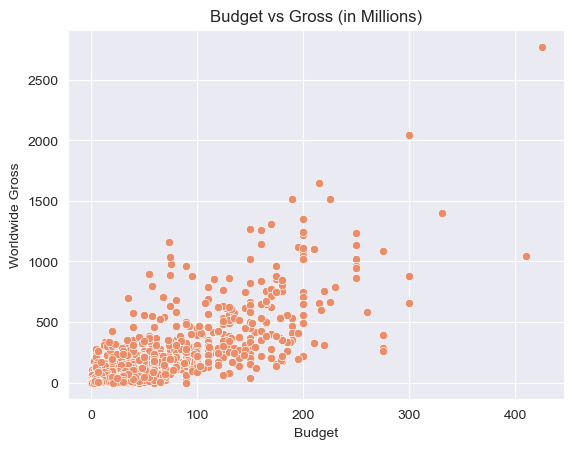

In [25]:
sns.set_style('darkgrid')
sns.set_palette('flare')
# Here you run your code to model the data
ax = sns.scatterplot(
    data = combined_film_df,
    x = combined_film_df.production_budget,
    y= combined_film_df.worldwide_gross,
)
rcParams['figure.figsize'] = 15, 8
ax.set_title("Budget vs Gross (in Millions)")
ax.set_xlabel("Budget")
ax.set_ylabel("Worldwide Gross");

#### Genre performance analysis

In [36]:
#return bar plot for specific column grouped by genre
def view_column_by_genre(column, title, ylabel, method = "median", plottype = "bar", dataframe = exploded_genre_df):
    sns.set_theme(font_scale = 1)
    ax = sns.catplot(
        data= dataframe,
        x = dataframe.genres,
        y= dataframe[column],
        kind = plottype,
        height = 9,
        aspect=2,
        order = sorted(exploded_genre_df.genres.unique()),
        estimator = method
    )
    ax.set_xlabels("Genre", fontsize=20)
    ax.set_ylabels(ylabel, fontsize=20)
    ax.figure.suptitle(title, fontsize=20)

    return ax

Worldwide gross per genre.

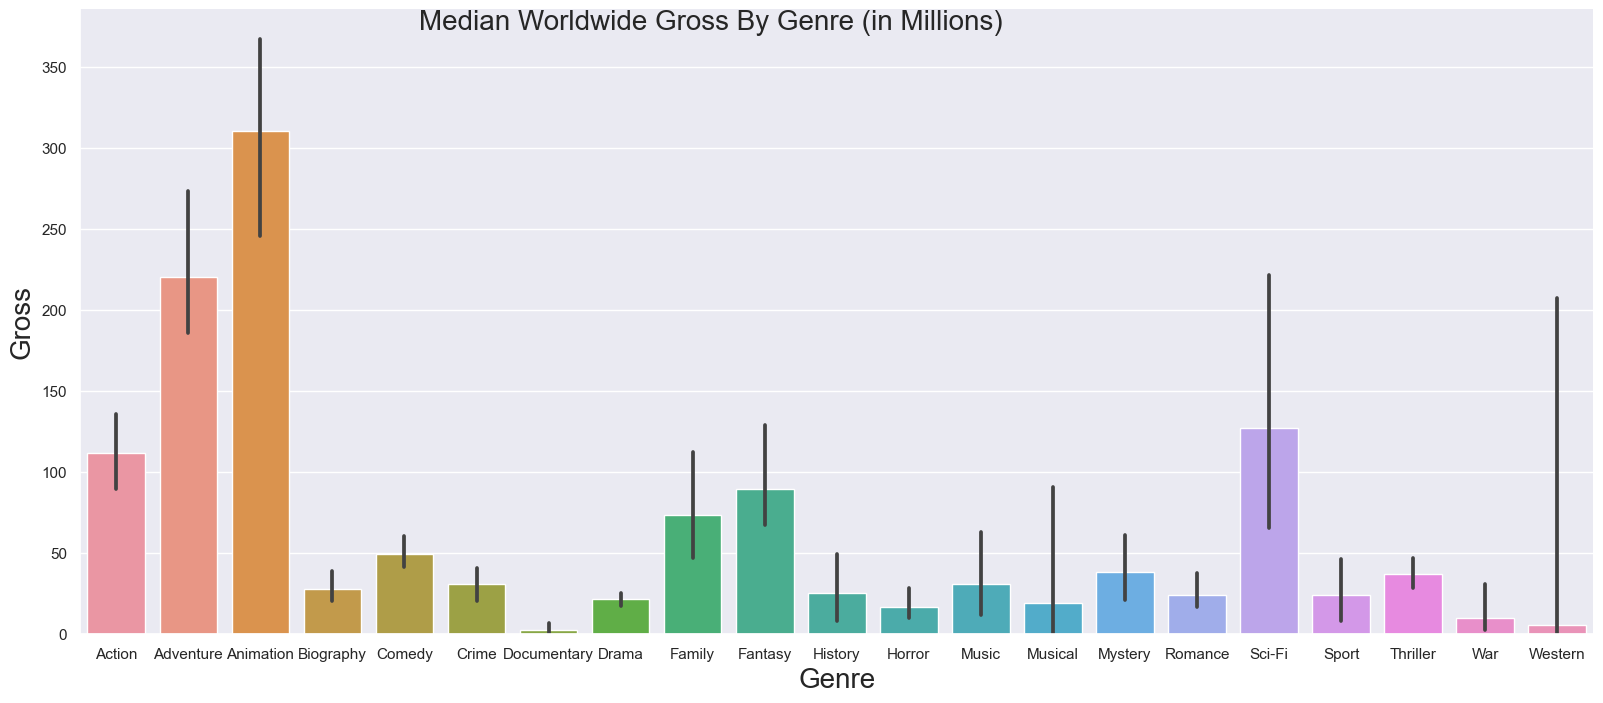

In [203]:
view_column_by_genre(
    "worldwide_gross",
    "Median Worldwide Gross By Genre (in Millions)",
    "Gross"
);

Return on investment per genre.

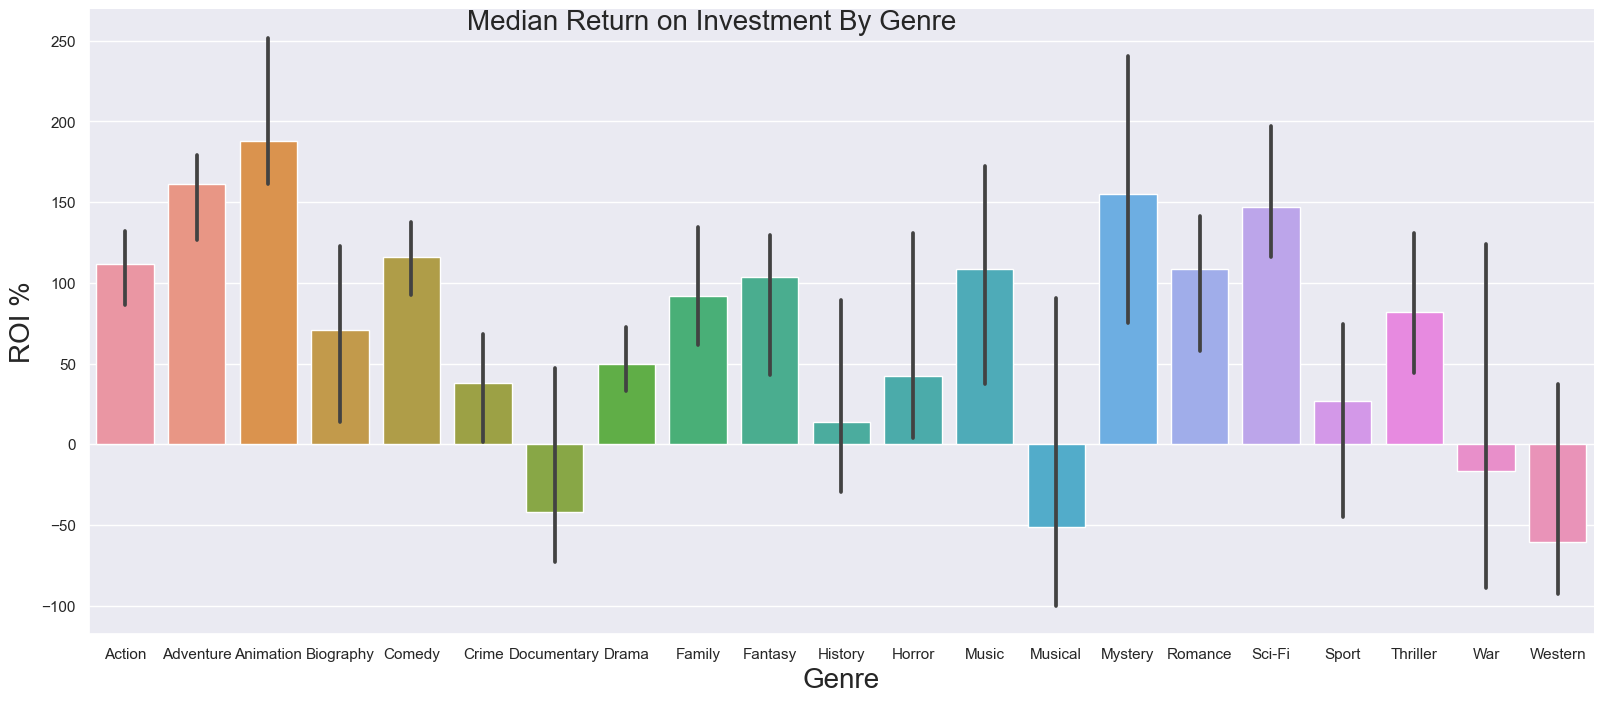

In [204]:
view_column_by_genre(
    "ROI",
    "Median Return on Investment By Genre",
    "ROI %"
);

Average rating per genre on IMDb and TheMovieDB.

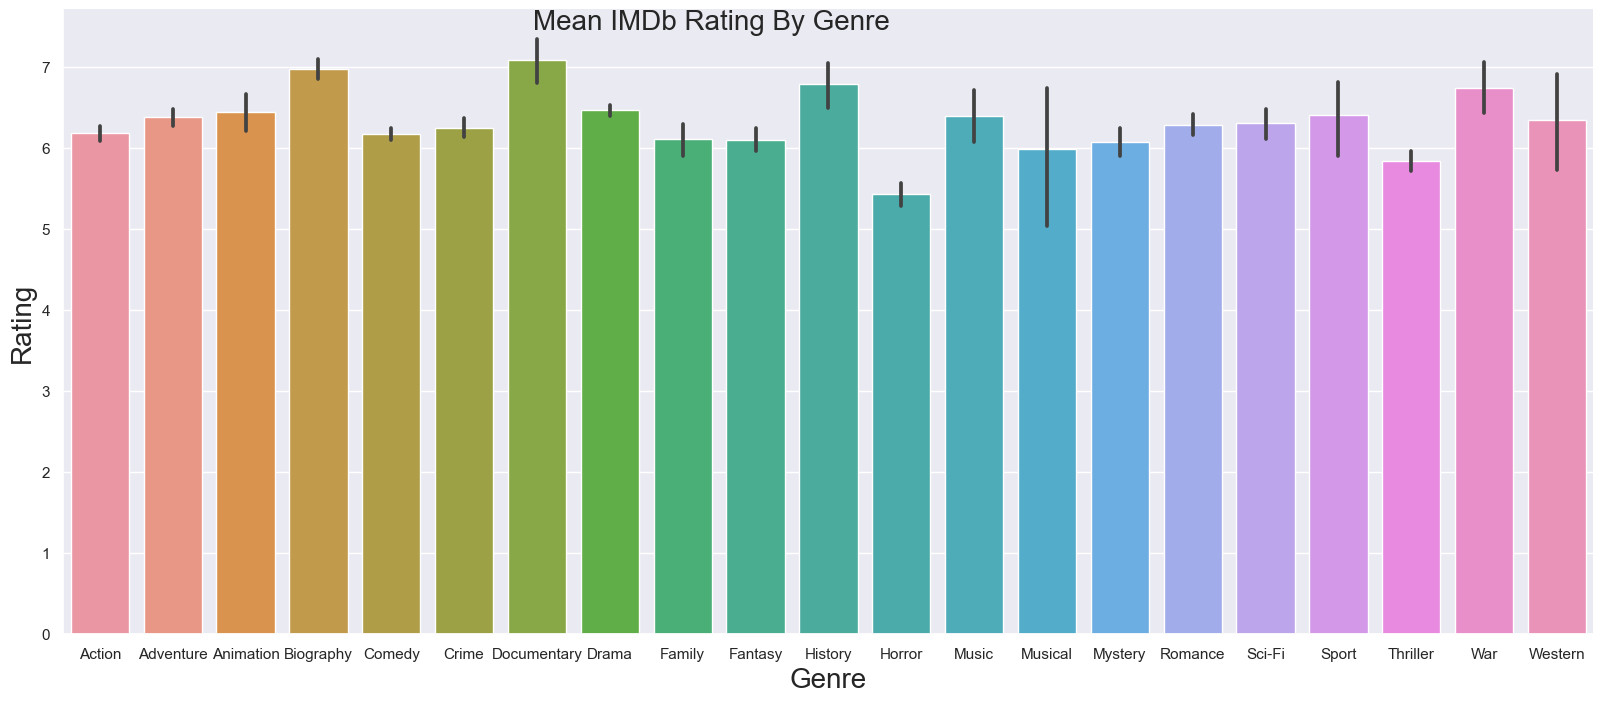

In [208]:
view_column_by_genre(
    "imdb_rating",
    "Mean IMDb Rating By Genre",
    "Rating",
    method="mean"
);

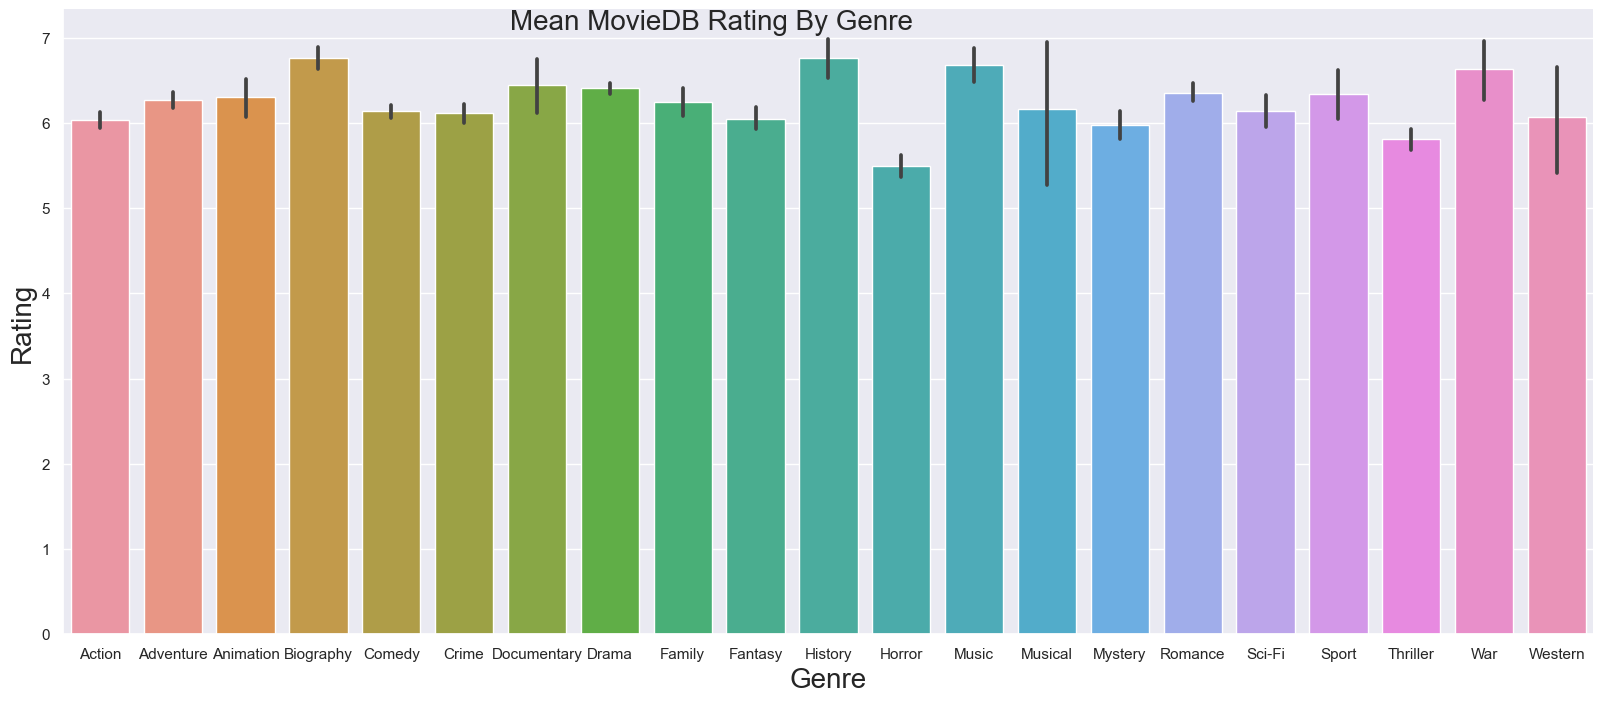

In [206]:
view_column_by_genre(
    "moviedb_rating",
    "Mean MovieDB Rating By Genre",
    "Rating",
    method= "mean"
);

Viewing runtime in minutes of the best performing films.

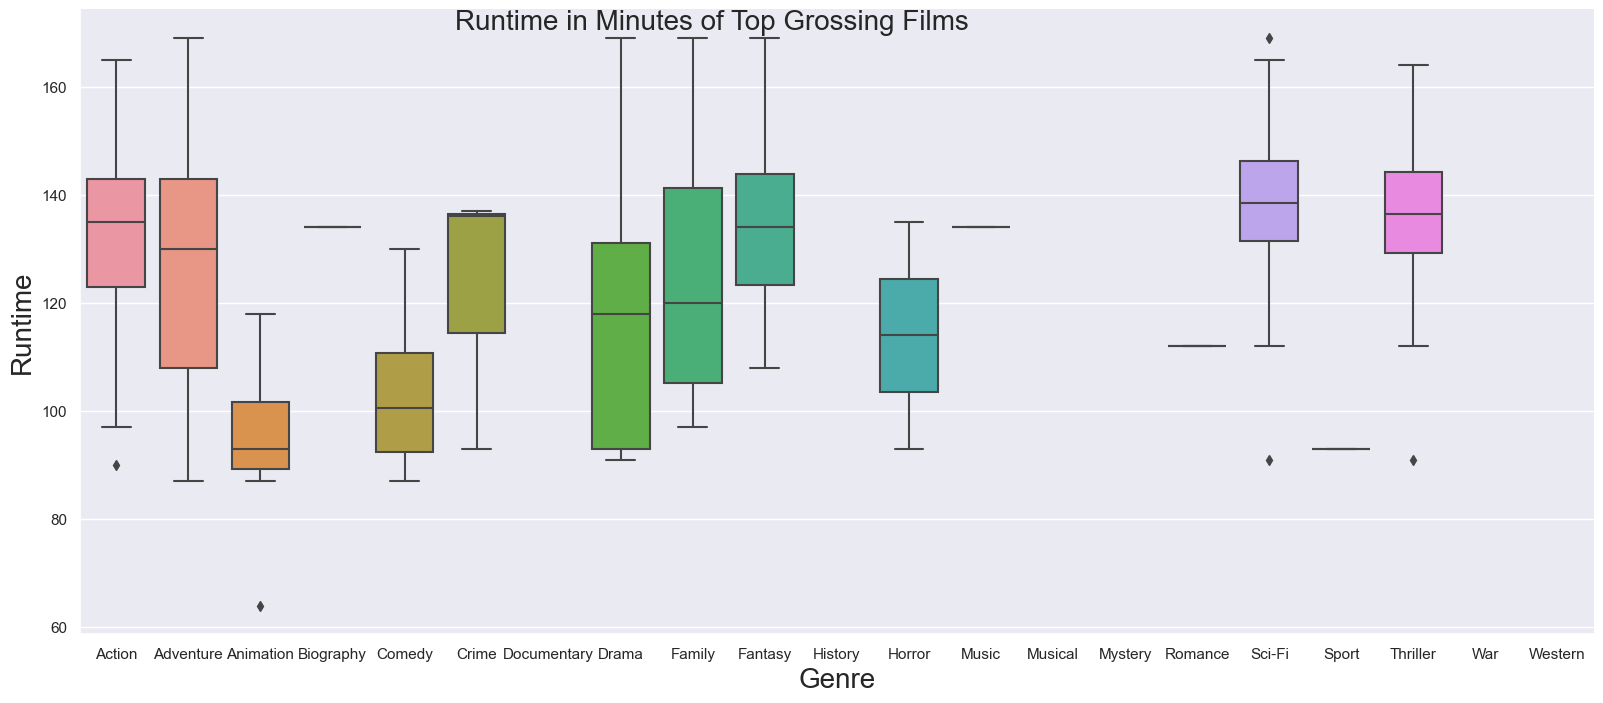

In [47]:
top_films_df = exploded_genre_df.sort_values("worldwide_gross", ascending=False).head(200)
view_column_by_genre(
    "runtime",
    "Runtime in Minutes of Top Grossing Films",
    "Runtime",
    plottype="box",
    dataframe=top_films_df
);

Typical budget for a given genre.

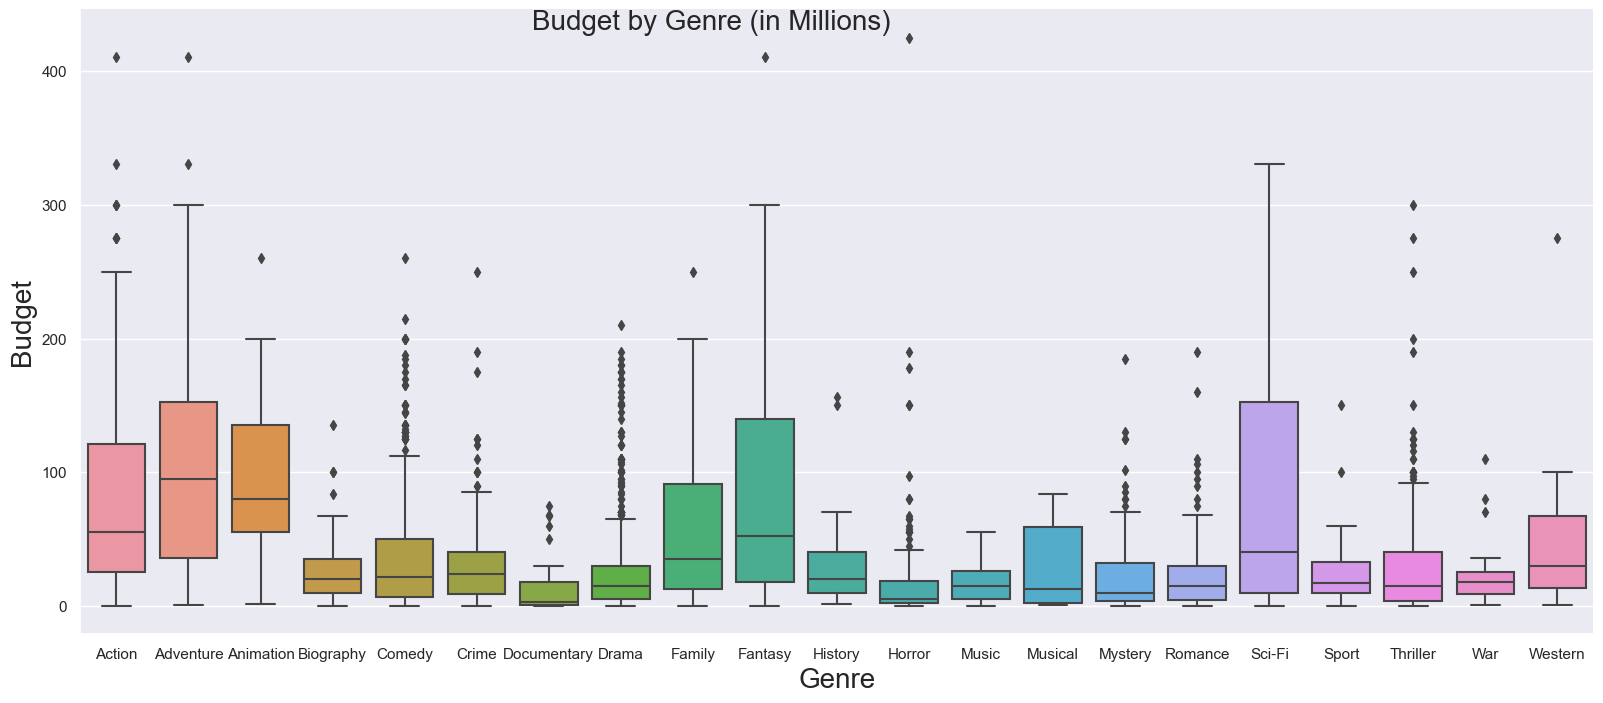

In [53]:
view_column_by_genre(
    "production_budget",
    "Budget by Genre (in Millions)",
    "Budget",
    plottype="box"
);

Typical budget for best grossing filmns in a given genre.

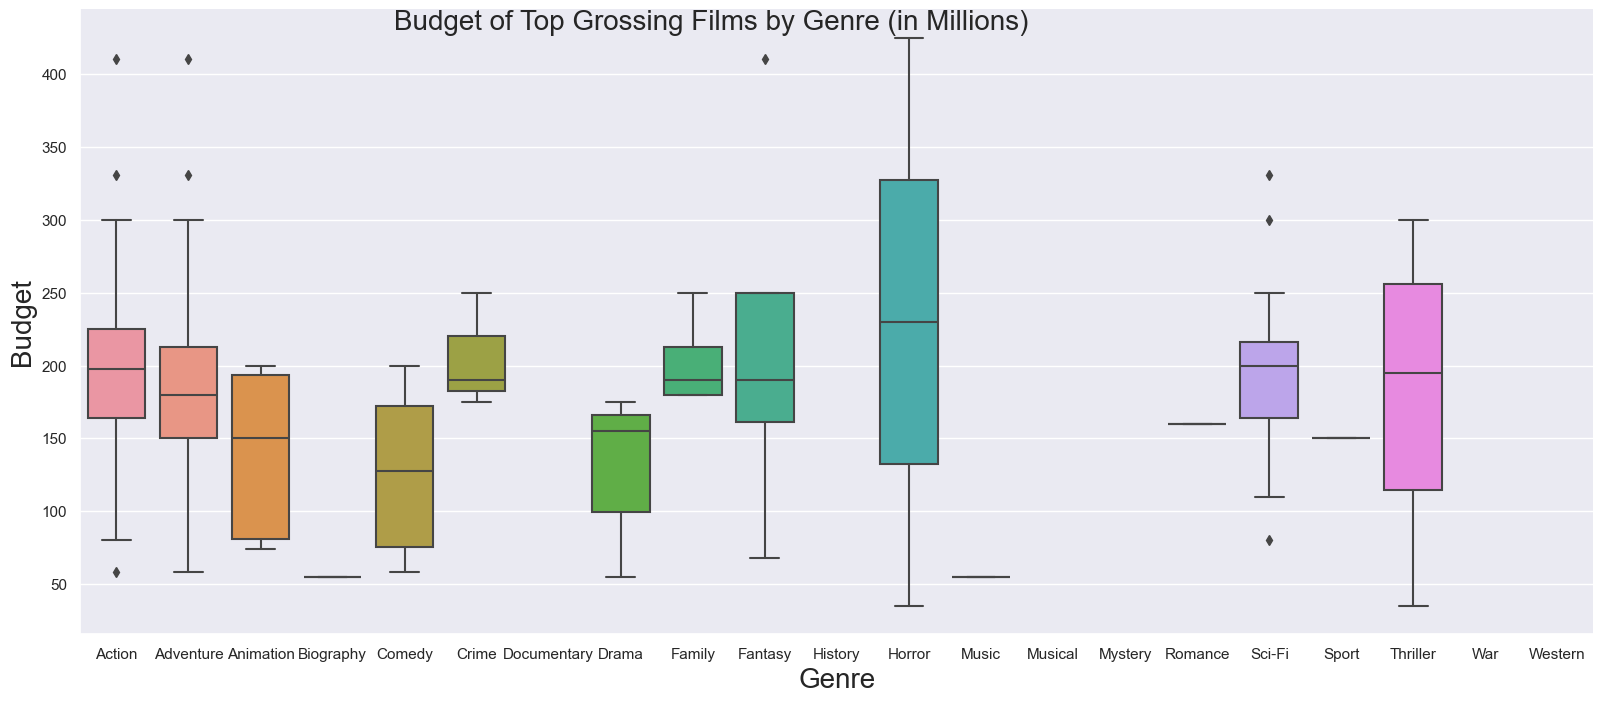

In [52]:
view_column_by_genre(
    "production_budget",
    "Budget of Top Grossing Films by Genre (in Millions)",
    "Budget",
    plottype="box",
    dataframe=top_films_df
);

#### Closing IMDb database connection

In [186]:
conn.close()

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***